<a href="https://colab.research.google.com/github/HasiniSandunika/yotube-veiws-predictor/blob/master/youtube_veiws_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
uploaded = files.upload()

Using TensorFlow backend.


Saving video_data.csv to video_data.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['video_data.csv']))
print('The size of the dataset is',df.shape)
print(df)

The size of the dataset is (3364, 4)
       Likes  Dislikes  Subscribers    Views
0     104460      3365      7300000  1988888
1     103203      3570      3300000  2617005
2      22485       612      1800000   932230
3      23077      1337       465000  1165800
4      12315       522     11000000   551165
...      ...       ...          ...      ...
3359    4833        47       465000   193093
3360     118        16        19000    21784
3361      29         2         6100     5427
3362     321        34         3400   150226
3363     143         7       116000    29077

[3364 rows x 4 columns]


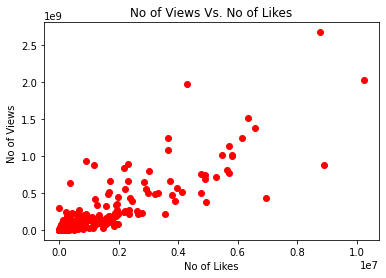

In [0]:
plt.scatter(df.Likes, df.Views, marker='o',color='red')
plt.xlabel('No of Likes')
plt.ylabel('No of Views ') 
plt.title('No of Views Vs. No of Likes')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


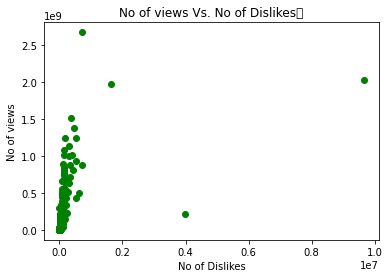

In [0]:
plt.scatter(df.Dislikes	, df.Views, marker='o',color='green')
plt.xlabel('No of Dislikes')
plt.ylabel('No of views') 
plt.title('No of views Vs. No of Dislikes	') 
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


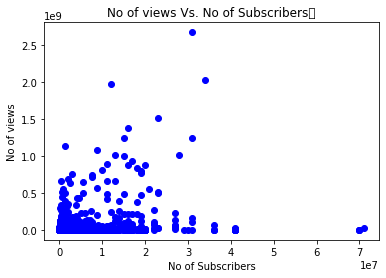

In [0]:
plt.scatter(df.Subscribers	, df.Views, marker='o',color='blue')
plt.xlabel('No of Subscribers')
plt.ylabel('No of views') 
plt.title('No of views Vs. No of Subscribers	')
plt.show()

In [0]:
train, test = train_test_split(df, test_size=0.2)
print('The size of the training dataset is',train.shape)
print(train)
print('The size of the testing dataset is',test.shape)
print(test)

The size of the training dataset is (2691, 4)
      Likes  Dislikes  Subscribers    Views
1583   1781        40      1500000    83765
3169  29674       433      5700000  1903978
2632   3169       334        71000  1579487
2144    434        14        60000     4612
521      18         2         2900     3628
...     ...       ...          ...      ...
2523   1175        93      1100000   183413
722   23232      1348       466000  1174853
1684   1433        93         6800   458496
1092    629        13       138000     5366
3104   5318       420       825000   683884

[2691 rows x 4 columns]
The size of the testing dataset is (673, 4)
       Likes  Dislikes  Subscribers     Views
240   163157      6350       452000  38452318
1592    5284       101      1500000    166310
1637  601599     23904       345000  82345832
1543    5267       273       579000    761722
918   159112      8109      2700000  14224374
...      ...       ...          ...       ...
2769    9412       289      9800000

In [0]:
X_train_norm = preprocessing.scale(train.iloc[:,0:3])
X_test_norm = preprocessing.scale(test.iloc[:,0:3])
print('After mormalizing,\n')
print('X matrix for the training data is,')
print(X_train_norm)
print('And the dimensions are',X_train_norm.shape)
print('X matrix for the testing data is,')
print(X_test_norm)
print('And the dimensions are',X_test_norm.shape)
print('\n')
print('Y matrix for the training data is,')
print(train.iloc[:,3])
print('And the dimensions are',train.iloc[:,3].shape)
print('Y matrix for the testing data is,')
print(test.iloc[:,3])
print('And the dimensions are',test.iloc[:,3].shape)

After mormalizing,

X matrix for the training data is,
[[-0.21828935 -0.05945204 -0.17905109]
 [-0.17042984 -0.0575437   0.54004151]
 [-0.21590779 -0.05802443 -0.42371378]
 ...
 [-0.21888646 -0.05919468 -0.43470563]
 [-0.22026598 -0.05958315 -0.41224254]
 [-0.21222048 -0.05760683 -0.29461954]]
And the dimensions are (2691, 3)
X matrix for the testing data is,
[[ 0.0508059  -0.06331896 -0.36273279]
 [-0.21624957 -0.1802297  -0.1511848 ]
 [ 0.79246745  0.26509378 -0.38433168]
 ...
 [-0.22384309 -0.18185736 -0.43802612]
 [-0.00882075 -0.0155369   1.01959611]
 [ 0.4560621   0.26483186  0.13141749]]
And the dimensions are (673, 3)


Y matrix for the training data is,
1583      83765
3169    1903978
2632    1579487
2144       4612
521        3628
         ...   
2523     183413
722     1174853
1684     458496
1092       5366
3104     683884
Name: Views, Length: 2691, dtype: int64
And the dimensions are (2691,)
Y matrix for the testing data is,
240     38452318
1592      166310
1637    823458

In [0]:
model_reg = Sequential() 
model_reg.add(Dense(1, activation='linear', input_dim=3)) 
model_reg.summary()
OPTIMIZER_1=Adam(10000)
model_reg.compile(optimizer=OPTIMIZER_1,loss='mse' )
BATCH_SIZE_1 = 32 
EPOCHES_1 = 1000 
VERBOSE_1 = 1
training_1 = model_reg.fit(X_train_norm, train.iloc[:,3], batch_size=BATCH_SIZE_1, epochs=EPOCHES_1,verbose=VERBOSE_1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2691/2691 [==============================] - 0s 118us/step - loss: 11509569586936242.0000
Epoch 2/1000
2691/2691 [==============================] - 0s 30us/step - loss: 11382706943533570.0000
Epoch 3/1000
2691/2691 [==============================] - 0s 29us/step - loss: 11258994945999938.0000
Epoch 4/1000
2691/2691 [==============================] - 0s 30us/step - loss: 11135852263068818.0000
Epoch 5/1000
2691/2691 [==============================] - 0s 30us/step - loss: 11016459782025598.0000
Epoch 6/1000
2691/2691 [==============================] - 0s 28us/step - loss: 10897893672987088.0000
Epoch 7/1000
2691/2691 [=================

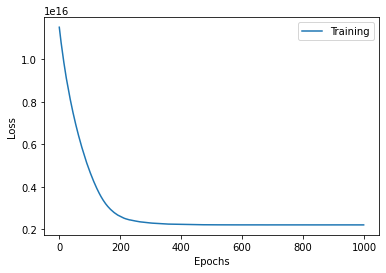

In [0]:
%matplotlib inline
def plot_history(network_history):
   plt.figure() 
   plt.xlabel('Epochs') 
   plt.ylabel('Loss') 
   plt.plot(network_history.history['loss']) 
   plt.legend(['Training'])
   plt.show()
plot_history(training_1)

In [0]:
pred_test_1 = model_reg.predict(X_test_norm)
pred_train_1 = model_reg.predict(X_train_norm)
print('After building the linear regression model, predicted views of the training dataset')
print(pred_train_1)
print('The dimensions of the training dataset are,',pred_train_1.shape)
print('\n')
print('After building the linear regression model, predicted views of the testing dataset')
print(pred_test_1)
print('The dimensions of the testing dataset are,',pred_test_1.shape)


After building the linear regression model, predicted views of the training dataset
[[  72562.]
 [3635896.]
 [ 542952.]
 ...
 [ 275678.]
 [ 126360.]
 [ 747594.]]
The dimensions of the training dataset are, (2691, 1)


After building the linear regression model, predicted views of the testing dataset
[[ 2.4127242e+07]
 [-1.1585560e+06]
 [ 9.3832720e+07]
 [-9.4006600e+05]
 [ 2.3446930e+07]
 [ 1.3889800e+05]
 [ 1.6918877e+08]
 [ 8.6545750e+06]
 [ 1.5327096e+07]
 [-1.6453080e+06]
 [ 6.3928790e+06]
 [ 8.2056300e+06]
 [-1.4838940e+06]
 [-1.3203360e+06]
 [-1.0964980e+06]
 [-1.6941800e+06]
 [ 3.3944392e+07]
 [-1.5766900e+06]
 [-9.3592000e+05]
 [-1.1888660e+06]
 [-9.5476200e+05]
 [-5.6396000e+04]
 [ 1.9339060e+06]
 [-6.8384400e+05]
 [-1.6415040e+06]
 [-1.9333580e+06]
 [-1.6674540e+06]
 [-1.3301920e+06]
 [-1.3384340e+06]
 [-2.2208000e+06]
 [-1.6728060e+06]
 [ 3.6795080e+06]
 [ 2.8177042e+07]
 [-1.6935140e+06]
 [-2.3694400e+05]
 [-9.2830000e+05]
 [ 2.2448640e+06]
 [-2.8661240e+06]
 [-1.6655900e+0

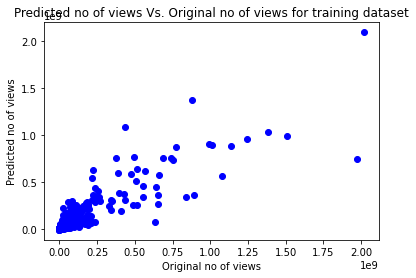

In [0]:
plt.scatter(train.iloc[:,3],pred_train_1,marker='o',color='blue')
plt.xlabel('Original no of views')
plt.ylabel('Predicted no of views') 
plt.title('Predicted no of views Vs. Original no of views for training dataset')
plt.show()

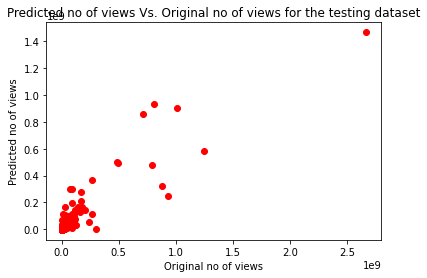

In [0]:
plt.scatter(test.iloc[:,3],pred_test_1,marker='o',color='red')
plt.xlabel('Original no of views')
plt.ylabel('Predicted no of views') 
plt.title('Predicted no of views Vs. Original no of views for the testing dataset')
plt.show()

In [0]:
print('The R2 value for the training dataset is,',r2_score(train.iloc[:,3], pred_train_1))
print('\n')
print('The R2 value for the testing dataset is,',r2_score(test.iloc[:,3], pred_test_1))

The R2 value for the training dataset is, 0.8033713633149966


The R2 value for the testing dataset is, 0.77056683575988


In [0]:
model_dnn = Sequential() 
model_dnn.add(Dense(13, activation=tf.nn.relu, input_shape=(3,))) 
model_dnn.add(Dense(13, activation=tf.nn.relu))
model_dnn.add(Dense(13, activation=tf.nn.relu))
model_dnn.add(Dense(13, activation=tf.nn.relu))
model_dnn.add(Dense(1))
model_dnn.summary()
OPTIMIZER_2=Adam(0.003)
model_reg.compile(optimizer=OPTIMIZER_2, loss='mse')
BATCH_SIZE_2 = 32 
EPOCHES_2 = 1000 
VERBOSE_2 = 1
training_2 = model_reg.fit(x=X_train_norm, y=train.iloc[:,3], batch_size=BATCH_SIZE_2, epochs=EPOCHES_2, verbose=VERBOSE_2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 13)                52        
_________________________________________________________________
dense_23 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_24 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_25 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 14        
Total params: 612
Trainable params: 612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2691/2691 [==============================] - 0s 42us/step - loss: 2198514064523501.5000
Epoch 2/1000
2691/269

In [0]:
def plot_history(network_history):
   plt.figure() 
   plt.xlabel('Epochs') 
   plt.ylabel('Loss') 
   plt.plot(network_history.history['loss']) 
   plt.legend(['Training'])
   plt.show()
plot_history(training_2)


In [0]:
pred_test_2 = model_dnn.predict(X_test_norm)
pred_train_2 = model_dnn.predict(X_train_norm)
print('After building the DNN model, predicted views of the training dataset')
print(pred_train_2)
print('The dimensions of the training dataset are,',pred_train_2.shape)
print('\n')
print('After building the DNN model, predicted views of the testing dataset')
print(pred_test_2)
print('The dimensions of the testing dataset are,',pred_test_2.shape)


After building the DNN model, predicted views of the training dataset
[[-0.00097149]
 [-0.03893321]
 [-0.00253606]
 ...
 [-0.00271796]
 [-0.00198983]
 [ 0.00079527]]
The dimensions of the training dataset are, (2691, 1)


After building the DNN model, predicted views of the testing dataset
[[-3.45115084e-03]
 [-9.87942913e-04]
 [-3.82258333e-02]
 [-5.34840161e-03]
 [-1.27929589e-03]
 [-4.94083483e-03]
 [ 1.76742207e-02]
 [-7.29164202e-03]
 [-6.25790516e-03]
 [-6.82549737e-03]
 [-7.29461806e-03]
 [-1.77502260e-03]
 [-4.56098281e-03]
 [-7.20528793e-03]
 [-7.04637729e-03]
 [-6.71983697e-03]
 [ 1.91259338e-03]
 [-5.72776981e-03]
 [-7.31140794e-03]
 [-5.40627912e-03]
 [-5.73309232e-03]
 [-5.80051029e-03]
 [-7.27602886e-03]
 [-5.14572673e-03]
 [-5.60364733e-03]
 [-1.74904126e-03]
 [-7.09830411e-03]
 [-1.21176033e-03]
 [-6.87747747e-02]
 [-3.96463554e-03]
 [-6.79289643e-03]
 [-2.54809335e-02]
 [-5.97773213e-03]
 [-6.71956362e-03]
 [-7.51693407e-03]
 [-6.89825648e-03]
 [-3.12357745e-03]
 [-1.5

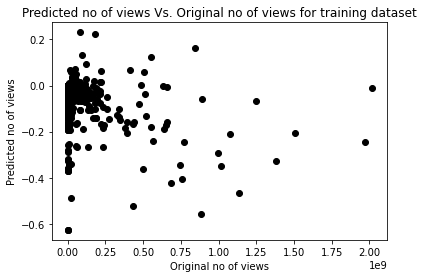

In [0]:
plt.scatter(train.iloc[:,3],pred_train_2,marker='o',color='black')
plt.xlabel('Original no of views')
plt.ylabel('Predicted no of views') 
plt.title('Predicted no of views Vs. Original no of views for training dataset')
plt.show()

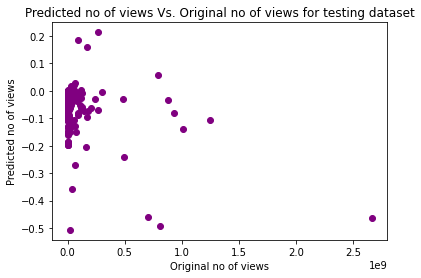

In [0]:
plt.scatter(test.iloc[:,3],pred_test_2,marker='o',color='purple')
plt.xlabel('Original no of views')
plt.ylabel('Predicted no of views') 
plt.title('Predicted no of views Vs. Original no of views for testing dataset')
plt.show()

In [0]:
print('The R2 value for the training dataset is,',r2_score(train.iloc[:,3], pred_train_2))
print('\n')
print('The R2 value for the testing dataset is,',r2_score(test.iloc[:,3], pred_test_2))

The R2 value for the training dataset is, -0.03595605519741718


The R2 value for the testing dataset is, -0.031063645131672812
